## Problem statement:
Analyst of Twitter wants to find out what was the most positive and negative tweet of Donald Trump in the year 2017. Hence he decides to apply NLP techniques to the data he collected about Trump's tweet over the year


Dataset Description:
The dataset consist of 7375 tweets with 10 columns

1. Date - Date of the Tweet 
2. Time - Time of the Tweet 
3. Tweet_Text- Text of Tweet
4. Type- Type of the Tweet (Text, Image etc) 
5. Media_Type- Type of Media Involved 
6. Hashtags- Hashtags tagged along with Tweet 
7. Tweet_ld- Twitter ID
8. Tweet_Url- Webpage of the Tweet
9. twt_favourites_lS_THlS_LlKE_QUESTlON_MARK- How many people have liked his tweet
10. Retweets- Retweets he recived for his tweets



In [1]:
#IMPORT THE REQUIRED LIBRARIES

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('maxnet_ne_chunker')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Error loading maxnet_ne_chunker: Package
[nltk_data]     'maxnet_ne_chunker' not found in index
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [3]:
tweet = pd.read_csv('/content/drive/MyDrive/Donald-Tweets!.csv')
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,Unnamed: 10,Unnamed: 11
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,NaN,NaN
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,NaN,NaN
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,NaN,NaN
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,NaN,NaN
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,NaN,NaN


In [4]:
# dropping unnamed columns
tweet.drop(columns=['Unnamed: 10','Unnamed: 11'],inplace=True)

In [5]:
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688


In [74]:
tweet.tail()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,...,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball),lemmatext,lemma_str,word_count,review_len,sentiment_score,polarity,polarity_encoded
7370,15-07-16,13:10:00,I loved firing goofball atheist Penn @pennjill...,text,NaN,NaN,6.220000e+17,https://twitter.com/realDonaldTrump/status/621...,953,431,...,atheist penn pennjillett apprentic never chanc...,ath pen pennjillet appr nev chant wrot let beg...,atheist penn pennjillett apprentic never chanc...,atheist penn pennjillette apprentice never cha...,a t h e i s t p e n n p e n n j i l l e t ...,10,163,"(0.0, 0.0)",0.0000,neutral
7371,15-07-16,10:18:31,I hear @pennjillette show on Broadway is terri...,text,NaN,NaN,6.220000e+17,https://twitter.com/realDonaldTrump/status/621...,1175,1086,...,show broadway terribl surpris bore guy penn wi...,show broadway terr surpr bor guy pen without a...,show broadway terribl surpris bore guy penn wi...,show broadway terrible surprised boring guy pe...,s h o w b r o a d w a y t e r r i b l e ...,14,183,"(-0.4875, 0.825)",-0.4875,negative
7372,15-07-16,10:10:17,Irrelevant clown @KarlRove sweats and shakes n...,text,NaN,NaN,6.220000e+17,https://twitter.com/realDonaldTrump/status/621...,1494,930,...,sweat shake nervous foxnew talk bull zero cred...,swe shak nerv foxnew talk bul zero cred mad fo...,sweat shake nervous foxnew talk bull zero cred...,sweat shake nervously foxnews talk bull zero c...,s w e a t s h a k e n e r v o u s l y f ...,11,123,"(0.0, 0.0)",0.0000,neutral
7373,15-07-16,9:44:07,"""@HoustonWelder: Donald Trump is one of the se...",text,NaN,NaN,6.220000e+17,https://twitter.com/realDonaldTrump/status/621...,1800,1738,...,donald trump one sexiest men planet everi woma...,donald trump on sexiest men planet every wom d...,donald trump one sexiest men planet everi woma...,donald trump one sexiest men planet every woma...,d o n a l d t r u m p o n e s e x i e s ...,14,153,"(0.5249999999999999, 0.625)",0.5250,positive
7374,15-07-16,0:21:25,RT @marklevinshow: Trump: Rove is a clown and ...,link,NaN,NaN,6.210000e+17,https://twitter.com/realDonaldTrump/status/621...,962,689,...,trump rove clown loser http tcojfdkiatjen,trump rov clown los http tcojfdkiats,trump rove clown loser http tcojfdkiatjen,trump rove clown loser http tcojfdkiatjen,t r u m p r o v e c l o w n l o s e r ...,6,81,"(0.0, 0.0)",0.0000,neutral


In [6]:
#FREQUENCY OF TRUMP'S TWEETS IN 2017

tweet_by_date = tweet.copy()
tweet_by_date['Date'] = pd.to_datetime(tweet['Date'], yearfirst=True) 
tweet_by_date['Date'] = tweet_by_date['Date'].dt.month
tweet_by_date = pd.DataFrame(tweet_by_date.groupby(['Date']).size().sort_values(ascending=True).rename('Tweets')) 
tweet_by_date


,Tweets
Date,
6,258
4,287
5,357
3,456
1,507
2,516
12,579
11,709
8,726


In [7]:
#Clean the data (Use functions from Python libraries such as re, string and NLTK to remove these unnecessary elements) 
#and store cleaned data as a separate column to the DataFrame

# Load the required libraries for cleaning
import string,re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


In [8]:
# Create a function to generate cleaned data from raw text
def clean_text(tweet):
  tweet = word_tokenize(tweet) # Create tokens
  tweet = tweet[4:] # Remove RT@
  tweet= " ".join(tweet) # Join tokens
  tweet= re.sub('https','',tweet) # Remove 'https' text with blank
  tweet = [char for char in tweet if char not in string.punctuation] # Remove punctuations
  tweet = ''.join(tweet) # Join the leters
  tweet = [word for word in tweet.split() if word.lower() not in stopwords.words('english')] # Remove common english words (I, you, we,...)
  
  return " ".join(tweet)


In [9]:
# Apply the function to 'cleaned_text' to clean it
# Add cleaned data as a separate column to the DataFrame

tweet['cleaned_text']=tweet['Tweet_Text'].apply(clean_text)


In [10]:
# Print the first 5 values of cleaned tweet data

tweet['cleaned_text'].head()


0    deepest gratitude served armed forces ThankAVe...
1    New York soon making important decisions peopl...
2    small groups protesters last night passion gre...
3    open successful presidential election professi...
4    DC Met President Obama first time Really good ...
Name: cleaned_text, dtype: object

In [11]:
# Process the data to remove elements which may cause issues in analysis and store processed data as a separate column to the DataFrame

In [12]:
features = tweet['cleaned_text'] 
processed_features = []

for sentence in range(0, len(features)):
  # Remove all the special characters
  processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
  
  # Remove single characters appearing in the text except the start
  processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
  
  # Remove single characters appearing at the start
  processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
  
  # Substitute multiple spaces with a single space
  processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
  
  # Convert to lowercase
  processed_feature = processed_feature.lower()
  
  processed_features.append(processed_feature)


In [13]:
# Print first five values of processed data
processed_features[:5]


['deepest gratitude served armed forces thankavet tcowpk7qwpk8z',
 'new york soon making important decisions people running government',
 'small groups protesters last night passion great country come together proud',
 'open successful presidential election professional protesters incited media protesting unfair',
 'dc met president obama first time really good meeting great chemistry melania liked mrs lot']

In [14]:
# Add the processed data as a separate column to the DataFrame

tweet['processed_text'] = processed_features


In [15]:
# Observe the entire data

tweet.head()


,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...


In [16]:
#Apply Ngrams to processed data and print first 3 rows

In [17]:
processed_text_ngrams=list(nltk.ngrams(tweet['processed_text'], 8))

In [18]:
processed_text_ngrams[:3]

[('deepest gratitude served armed forces thankavet tcowpk7qwpk8z',
  'new york soon making important decisions people running government',
  'small groups protesters last night passion great country come together proud',
  'open successful presidential election professional protesters incited media protesting unfair',
  'dc met president obama first time really good meeting great chemistry melania liked mrs lot',
  'us marine corps thank service tcolz2dhrxzo4',
  'important evening forgotten man woman never forgotten come together never',
  '945pm electionnight maga tcohfujerzbod'),
 ('new york soon making important decisions people running government',
  'small groups protesters last night passion great country come together proud',
  'open successful presidential election professional protesters incited media protesting unfair',
  'dc met president obama first time really good meeting great chemistry melania liked mrs lot',
  'us marine corps thank service tcolz2dhrxzo4',
  'importan

In [19]:
# Question-6: Apply porter stemmer technique to processed data and store stemmer(porter) data as a separate column to the DataFrame

Porter stemmer remove the commoner morphological and inflexional endings from words in English

In [20]:
# Stemming
from nltk.stem.porter import PorterStemmer

def get_stemmed_text(corpus): 
  stemmer = PorterStemmer()
  return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

tweet['stemmedtext(porter)'] = get_stemmed_text(tweet['processed_text'])


In [21]:
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter)
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...,small group protest last night passion great c...
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...,open success presidenti elect profession prote...
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...,dc met presid obama first time realli good mee...


In [22]:
#Apply Lancaster stemmer technique to processed data and store stemmer(lancaster) data as a separate column to the DataFrame

Lancaster Stemmer is used to check the frequency of words

In [23]:
from nltk.stem import LancasterStemmer

def get_stemmed_text(corpus):
  stemmer = LancasterStemmer()
  return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus] 
  
tweet['stemmedtext(lancaster)'] = get_stemmed_text(tweet['processed_text'])


In [24]:
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancaster)
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...,small group protest last night passion great c...,smal group protest last night pass gre country...
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...,open success presidenti elect profession prote...,op success presid elect profess protest incit ...
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...,dc met presid obama first time realli good mee...,dc met presid obam first tim real good meet gr...


In [25]:
#Apply Snowball stemmer technique to processed data and store stemmer(snowball) data as a separate column to the DataFrame

Snowball Stemmer is similar to porter stemmer, but here we have to specify the English

In [26]:
from nltk.stem import SnowballStemmer

def get_stemmed_text(corpus):
  stemmer = SnowballStemmer('english')
  return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

tweet['stemmedtext(snowball)'] = get_stemmed_text(tweet['processed_text'])


In [27]:
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball)
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...,small group protest last night passion great c...,smal group protest last night pass gre country...,small group protest last night passion great c...
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...,open success presidenti elect profession prote...,op success presid elect profess protest incit ...,open success presidenti elect profession prote...
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...,dc met presid obama first time realli good mee...,dc met presid obam first tim real good meet gr...,dc met presid obama first time realli good mee...


In [28]:
#Apply Lemmatization technique to processed data and store lemmatized data as a separate column to the DataFrame

Lemmatize maps several words into one coomon root

In [29]:
# Lemmatization
from nltk.stem import WordNetLemmatizer

def get_lemmatized_text(corpus):
  lemmatizer = WordNetLemmatizer()
  return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

tweet['lemmatext'] = get_lemmatized_text(tweet['processed_text'])


In [30]:
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball),lemmatext
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitude served armed force thankavet...
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern,new york soon making important decision people...
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...,small group protest last night passion great c...,smal group protest last night pass gre country...,small group protest last night passion great c...,small group protester last night passion great...
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...,open success presidenti elect profession prote...,op success presid elect profess protest incit ...,open success presidenti elect profession prote...,open successful presidential election professi...
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...,dc met presid obama first time realli good mee...,dc met presid obam first tim real good meet gr...,dc met presid obama first time realli good mee...,dc met president obama first time really good ...


In [31]:
tweet['lemma_str'] = [' '.join(map(str,l)) for l in tweet['lemmatext']] 
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball),lemmatext,lemma_str
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitude served armed force thankavet...,d e e p e s t g r a t i t u d e s e r v e ...
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern,new york soon making important decision people...,n e w y o r k s o o n m a k i n g i m ...
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...,small group protest last night passion great c...,smal group protest last night pass gre country...,small group protest last night passion great c...,small group protester last night passion great...,s m a l l g r o u p p r o t e s t e r l ...
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...,open success presidenti elect profession prote...,op success presid elect profess protest incit ...,open success presidenti elect profession prote...,open successful presidential election professi...,o p e n s u c c e s s f u l p r e s i d e ...
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...,dc met presid obama first time realli good mee...,dc met presid obam first tim real good meet gr...,dc met presid obama first time realli good mee...,dc met president obama first time really good ...,d c m e t p r e s i d e n t o b a m a ...


In [32]:
tweet['word_count'] = tweet['lemmatext'].apply(lambda x: len(str(x).split())) 
tweet['review_len'] = tweet['lemma_str'].astype(str).apply(len)
tweet.head()


,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball),lemmatext,lemma_str,word_count,review_len
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitude served armed force thankavet...,d e e p e s t g r a t i t u d e s e r v e ...,7,119
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern,new york soon making important decision people...,n e w y o r k s o o n m a k i n g i m ...,9,129
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...,small group protest last night passion great c...,smal group protest last night pass gre country...,small group protest last night passion great c...,small group protester last night passion great...,s m a l l g r o u p p r o t e s t e r l ...,11,147
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...,open success presidenti elect profession prote...,op success presid elect profess protest incit ...,open success presidenti elect profession prote...,open successful presidential election professi...,o p e n s u c c e s s f u l p r e s i d e ...,10,185
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...,dc met presid obama first time realli good mee...,dc met presid obam first tim real good meet gr...,dc met presid obama first time realli good mee...,dc met president obama first time really good ...,d c m e t p r e s i d e n t o b a m a ...,15,179


In [33]:
#Calculate Sentiment scores for each text

Polarity is a measure which ranges from [-1,1]. Where 1 means positive Statement and -1 means Negative Statement. 0 is Neutral

In [34]:
from textblob import TextBlob

In [35]:
# Create a function to calculate Sentiment scores for each text
def generate_polarity(text):
  sentiment = TextBlob(text).sentiment
  return sentiment


In [36]:
# Apply the function to processed data
sentiment = tweet['lemmatext'].apply(generate_polarity) 
sentiment = sentiment.to_frame()
sentiment.head()


,lemmatext
0,"(0.0, 0.0)"
1,"(0.2681818181818182, 0.7272727272727273)"
2,"(0.3375, 0.5541666666666667)"
3,"(0.0875, 0.6375)"
4,"(0.5875, 0.6208333333333333)"


In [37]:
tweet['sentiment_score'] = sentiment 
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball),lemmatext,lemma_str,word_count,review_len,sentiment_score
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitude served armed force thankavet...,d e e p e s t g r a t i t u d e s e r v e ...,7,119,"(0.0, 0.0)"
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern,new york soon making important decision people...,n e w y o r k s o o n m a k i n g i m ...,9,129,"(0.2681818181818182, 0.7272727272727273)"
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...,small group protest last night passion great c...,smal group protest last night pass gre country...,small group protest last night passion great c...,small group protester last night passion great...,s m a l l g r o u p p r o t e s t e r l ...,11,147,"(0.3375, 0.5541666666666667)"
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...,open success presidenti elect profession prote...,op success presid elect profess protest incit ...,open success presidenti elect profession prote...,open successful presidential election professi...,o p e n s u c c e s s f u l p r e s i d e ...,10,185,"(0.0875, 0.6375)"
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...,dc met presid obama first time realli good mee...,dc met presid obam first tim real good meet gr...,dc met presid obama first time realli good mee...,dc met president obama first time really good ...,d c m e t p r e s i d e n t o b a m a ...,15,179,"(0.5875, 0.6208333333333333)"


In [38]:
#Question-11: Calculate polarity for processed data and store polarity as a separate column to DataFrame

In [39]:
# Use the first element as Polarity
sentiment['polarity'] = sentiment['lemmatext'].apply(lambda x:x[0])


In [40]:
# Add a column to DataFrame for Polarity score respectively

tweet['polarity'] = sentiment['polarity'] 
tweet.head()


,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,...,processed_text,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball),lemmatext,lemma_str,word_count,review_len,sentiment_score,polarity
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitude served armed force thankavet...,d e e p e s t g r a t i t u d e s e r v e ...,7,119,"(0.0, 0.0)",0.000000
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern,new york soon making important decision people...,n e w y o r k s o o n m a k i n g i m ...,9,129,"(0.2681818181818182, 0.7272727272727273)",0.268182
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,...,small groups protesters last night passion gre...,small group protest last night passion great c...,smal group protest last night pass gre country...,small group protest last night passion great c...,small group protester last night passion great...,s m a l l g r o u p p r o t e s t e r l ...,11,147,"(0.3375, 0.5541666666666667)",0.337500
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,...,open successful presidential election professi...,open success presidenti elect profession prote...,op success presid elect profess protest incit ...,open success presidenti elect profession prote...,open successful presidential election professi...,o p e n s u c c e s s f u l p r e s i d e ...,10,185,"(0.0875, 0.6375)",0.087500
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,...,dc met president obama first time really good ...,dc met presid obama first time realli good mee...,dc met presid obam first tim real good meet gr...,dc met presid obama first time realli good mee...,dc met president obama first time really good ...,d c m e t p r e s i d e n t o b a m a ...,15,179,"(0.5875, 0.6208333333333333)",0.587500


In [41]:
#Visualize the sentiment of the sentences using histogram

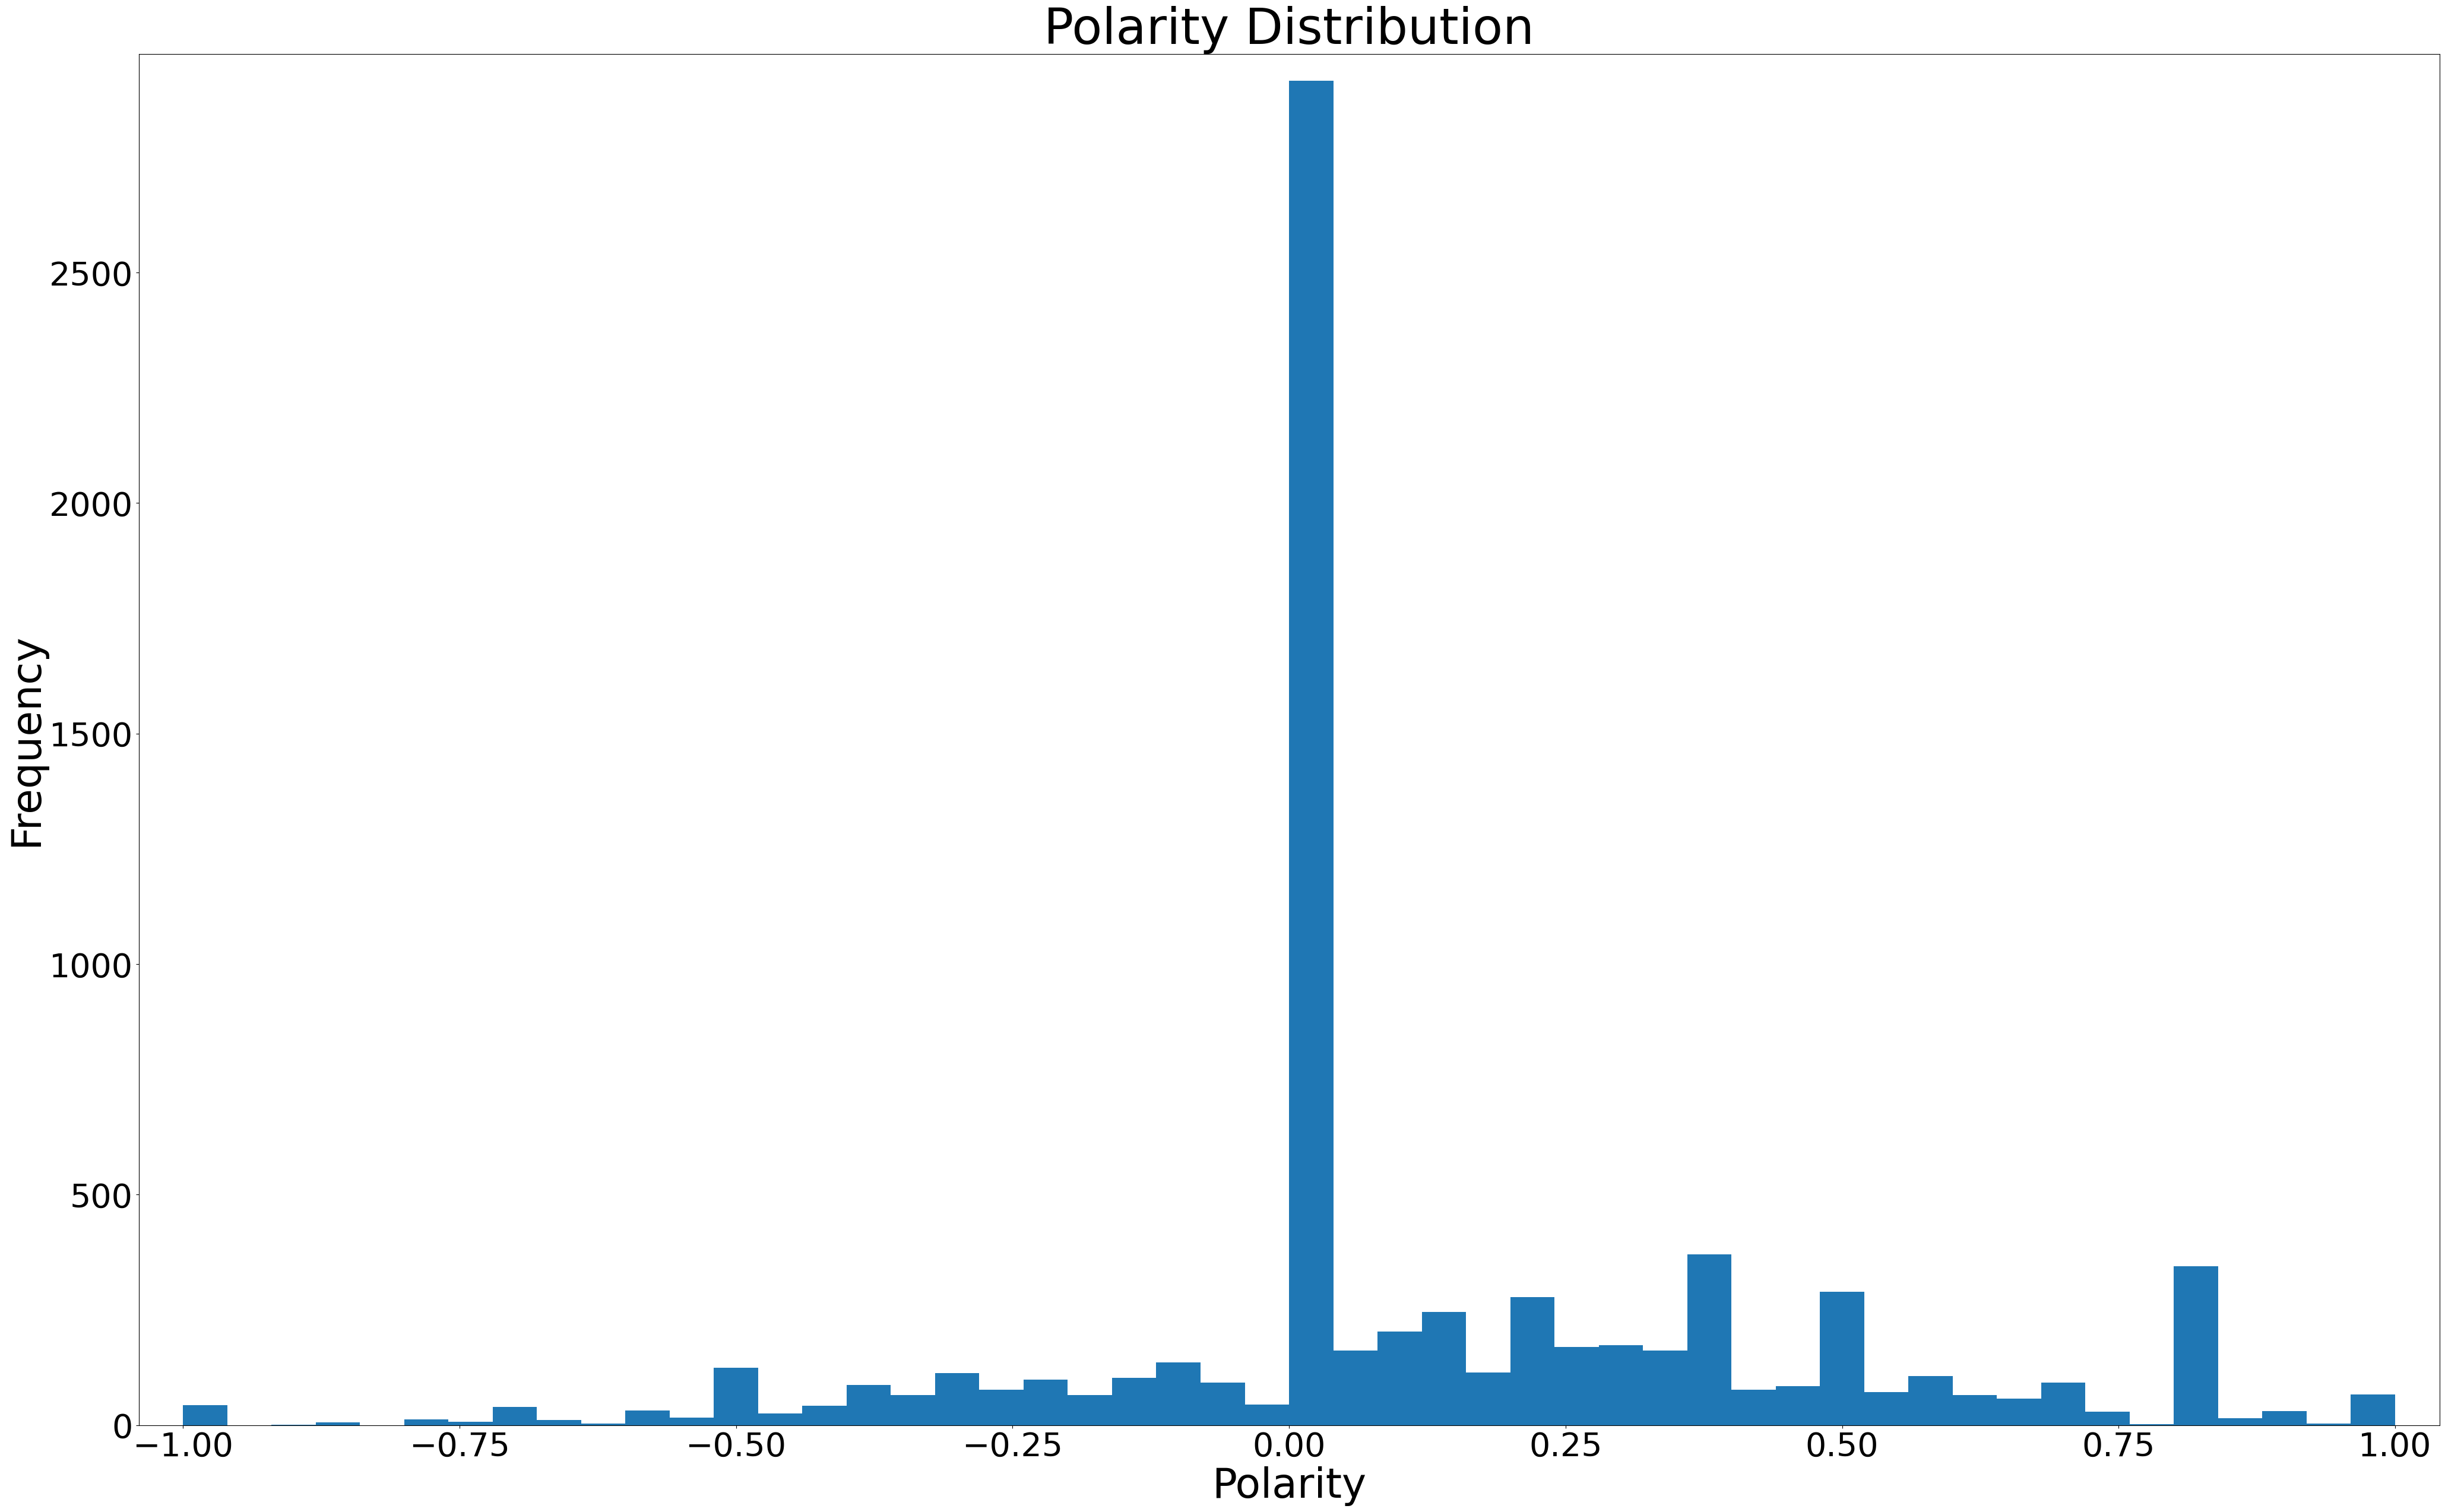

In [42]:

plt.figure(figsize=(50,30)) 
plt.margins(0.02)
plt.xlabel('Polarity', fontsize=50) 
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50) 
plt.yticks(fontsize=40)
plt.hist(tweet['polarity'], bins=50)
plt.title('Polarity Distribution', fontsize=60) 
plt.show()


In [43]:
#Question-13: Find the number of tweets of each category of polarity (Positive, Negative and Neutral)

In [44]:
# Encode polarity into 'positive', 'negative' and 'neutral' based on the score

tweet['polarity_encoded'] = ['positive' if x > 0 else 'negative' if x < 0 else 'neutral' for x in tweet['polarity']]


In [45]:
# Print the number of tweets of each category of polarity
tweet['polarity_encoded'].value_counts()


positive    3278
neutral     2851
negative    1246
Name: polarity_encoded, dtype: int64

We can observe that he received more positive and neutral comments rather than negative comments which shows that his actions were appreciated by people of U.S

In [46]:
#Question-14: Build a ML model and calculate the accuracy

In [47]:
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,...,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball),lemmatext,lemma_str,word_count,review_len,sentiment_score,polarity,polarity_encoded
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitude served armed force thankavet...,d e e p e s t g r a t i t u d e s e r v e ...,7,119,"(0.0, 0.0)",0.000000,neutral
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern,new york soon making important decision people...,n e w y o r k s o o n m a k i n g i m ...,9,129,"(0.2681818181818182, 0.7272727272727273)",0.268182,positive
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,...,small group protest last night passion great c...,smal group protest last night pass gre country...,small group protest last night passion great c...,small group protester last night passion great...,s m a l l g r o u p p r o t e s t e r l ...,11,147,"(0.3375, 0.5541666666666667)",0.337500,positive
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,...,open success presidenti elect profession prote...,op success presid elect profess protest incit ...,open success presidenti elect profession prote...,open successful presidential election professi...,o p e n s u c c e s s f u l p r e s i d e ...,10,185,"(0.0875, 0.6375)",0.087500,positive
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,...,dc met presid obama first time realli good mee...,dc met presid obam first tim real good meet gr...,dc met presid obama first time realli good mee...,dc met president obama first time really good ...,d c m e t p r e s i d e n t o b a m a ...,15,179,"(0.5875, 0.6208333333333333)",0.587500,positive


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(lowercase=True,ngram_range = (1,1),stop_words='english')


In [49]:
X = tweet['processed_text'] 
y = tweet['polarity_encoded']

In [50]:
X_vect = vectorizer.fit_transform(X)
df_vect = pd.DataFrame(X_vect.toarray(),columns=vectorizer.get_feature_names_out()) 
print(df_vect.head())
print(df_vect.shape)


    00  007llisav  00patriot   08  08102015   09   10  100  1000  10000  ...  \
0  0.0        0.0        0.0  0.0       0.0  0.0  0.0  0.0   0.0    0.0  ...   
1  0.0        0.0        0.0  0.0       0.0  0.0  0.0  0.0   0.0    0.0  ...   
2  0.0        0.0        0.0  0.0       0.0  0.0  0.0  0.0   0.0    0.0  ...   
3  0.0        0.0        0.0  0.0       0.0  0.0  0.0  0.0   0.0    0.0  ...   
4  0.0        0.0        0.0  0.0       0.0  0.0  0.0  0.0   0.0    0.0  ...   

   zogby  zone  zones  zucker  zuckerman  zuckermans  ωtime   ԍԍ  ԏԏԏ   լլ  
0    0.0   0.0    0.0     0.0        0.0         0.0    0.0  0.0  0.0  0.0  
1    0.0   0.0    0.0     0.0        0.0         0.0    0.0  0.0  0.0  0.0  
2    0.0   0.0    0.0     0.0        0.0         0.0    0.0  0.0  0.0  0.0  
3    0.0   0.0    0.0     0.0        0.0         0.0    0.0  0.0  0.0  0.0  
4    0.0   0.0    0.0     0.0        0.0         0.0    0.0  0.0  0.0  0.0  

[5 rows x 11765 columns]
(7375, 11765)


In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_vect, y,test_size=0.20,random_state = 7) 
print(X_train.shape)
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape)


(5900, 11765)
(1475, 11765)
(5900,)
(1475,)


In [52]:
del X_vect
del df_vect


In [53]:
import warnings
warnings.filterwarnings("ignore")


In [54]:
from sklearn.model_selection import cross_val_score,KFold
#machine learning algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


models=[]
models.append(('knn',KNeighborsClassifier()))

#models.append(('lr',LogisticRegression()))
models.append(('Random Forest',RandomForestClassifier()))
#models.append(('gradient boosting classifier',GradientBoostingClassifier()))

for name,model in models:
  kfold=KFold(n_splits=5,random_state=7,shuffle=True)
  cross_val_sc=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=kfold)
  print('{} : acc: {}(standard deviation: {})'.format(name,cross_val_sc.mean(),cross_val_sc.std()))


knn : acc: 0.39915254237288134(standard deviation: 0.010239869469147936)
Random Forest : acc: 0.8283050847457627(standard deviation: 0.010163840237671128)


In [55]:
#Question-15: Find the most positive and most negative tweet using polarity Score

In [56]:
# Print the most positive and most negative tweet

print("The most positive tweet:",tweet.iloc[tweet['polarity'].idxmax()]['processed_text']) 
print("The most negative tweet:",tweet.iloc[tweet['polarity'].idxmin()]['processed_text'])


The most positive tweet: thank law enforcement officers vpdebate police officers best us mikepence
The most negative tweet: lead border securityno solutions ideas credibilityshe supported nafta worst deal us history debate


In [57]:
#Question-16: Find the Parts of Speech (POS) for most positive and most negative tweet

POS tagging indicates how a word functions in a meaning as well as grammatically within the sentence

In [58]:
sent= tweet.iloc[tweet['polarity'].idxmax()]['processed_text'] 
sent_tokens= word_tokenize(sent)

In [59]:
for token in sent_tokens:
  print(nltk.pos_tag([token]))


[('thank', 'NN')]
[('law', 'NN')]
[('enforcement', 'NN')]
[('officers', 'NNS')]
[('vpdebate', 'NN')]
[('police', 'NNS')]
[('officers', 'NNS')]
[('best', 'JJS')]
[('us', 'PRP')]
[('mikepence', 'NN')]


In [60]:
sent= tweet.iloc[tweet['polarity'].idxmin()]['processed_text'] 
sent_tokens= word_tokenize(sent)

In [61]:
for token in sent_tokens:
  print(nltk.pos_tag([token]))


[('lead', 'NN')]
[('border', 'NN')]
[('securityno', 'NN')]
[('solutions', 'NNS')]
[('ideas', 'NNS')]
[('credibilityshe', 'NN')]
[('supported', 'VBN')]
[('nafta', 'NN')]
[('worst', 'JJS')]
[('deal', 'NN')]
[('us', 'PRP')]
[('history', 'NN')]
[('debate', 'NN')]


In [62]:
#Question-17: Apply Named Entity Recognition (NER) for most positive and most negative tweet and write your Inference

NER is a method of associating the named entities to their appropriate types

It also helps in automatic identification and counting of occurances of named entities in a collection of information


In [63]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk import ne_chunk
ne_sent=tweet.iloc[tweet['polarity'].idxmax()]['processed_text'] 
ne_tokens = word_tokenize(ne_sent)
ne_tags= nltk.pos_tag(ne_tokens) 
ne_ner= ne_chunk(ne_tags)
print(ne_ner)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


(S
  thank/NN
  law/NN
  enforcement/NN
  officers/NNS
  vpdebate/VBP
  police/NNS
  officers/NNS
  best/VBP
  us/PRP
  mikepence/NN)


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [64]:
from nltk import ne_chunk
ne_sent=tweet.iloc[tweet['polarity'].idxmin()]['processed_text'] 
ne_tokens = word_tokenize(ne_sent)
ne_tags= nltk.pos_tag(ne_tokens) 
ne_ner= ne_chunk(ne_tags)
print(ne_ner)


(S
  lead/JJ
  border/NN
  securityno/JJ
  solutions/NNS
  ideas/NNS
  credibilityshe/VBP
  supported/VBD
  nafta/JJ
  worst/JJS
  deal/VB
  us/PRP
  history/NN
  debate/NN)


We can Infer that, NER like POS tagger is also not 100% accurate and sometimes returns wrong answers just like above

**Sentiment Analysis using TRANSFORMERS**

In [65]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 104.1 MB/s eta 0:00:00


In [66]:
from transformers import pipeline

In [67]:
sentiment = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [77]:
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,...,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball),lemmatext,lemma_str,word_count,review_len,sentiment_score,polarity,polarity_encoded
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitude served armed force thankavet...,d e e p e s t g r a t i t u d e s e r v e ...,7,119,"(0.0, 0.0)",0.000000,neutral
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern,new york soon making important decision people...,n e w y o r k s o o n m a k i n g i m ...,9,129,"(0.2681818181818182, 0.7272727272727273)",0.268182,positive
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,...,small group protest last night passion great c...,smal group protest last night pass gre country...,small group protest last night passion great c...,small group protester last night passion great...,s m a l l g r o u p p r o t e s t e r l ...,11,147,"(0.3375, 0.5541666666666667)",0.337500,positive
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,...,open success presidenti elect profession prote...,op success presid elect profess protest incit ...,open success presidenti elect profession prote...,open successful presidential election professi...,o p e n s u c c e s s f u l p r e s i d e ...,10,185,"(0.0875, 0.6375)",0.087500,positive
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,...,dc met presid obama first time realli good mee...,dc met presid obam first tim real good meet gr...,dc met presid obama first time realli good mee...,dc met president obama first time really good ...,d c m e t p r e s i d e n t o b a m a ...,15,179,"(0.5875, 0.6208333333333333)",0.587500,positive


In [78]:
tweet.shape

(7375, 22)

In [81]:
tweet.iloc[2555]

Date                                                                                  16-03-24
Time                                                                                  16:02:06
Tweet_Text                                   Endorsements for Lyin Ted Cruz- https://t.co/c...
Type                                                                                      text
Media_Type                                                                                 NaN
Hashtags                                                                                   NaN
Tweet_Id                                                                  713000000000000000.0
Tweet_Url                                    https://twitter.com/realDonaldTrump/status/713...
twt_favourites_IS_THIS_LIKE_QUESTION_MARK                                                 8883
Retweets                                                                                  3421
cleaned_text                                      

In [73]:
print(tweet['Tweet_Text'][1])
sentiment(tweet['Tweet_Text'][1])

Busy day planned in New York. Will soon be making some very important decisions on the people who will be running our government!


[{'label': 'POSITIVE', 'score': 0.9978532195091248}]

In [76]:
print(tweet['Tweet_Text'][7374])
sentiment(tweet['Tweet_Text'][7374])

RT @marklevinshow: Trump: Rove is a clown and a loser http://t.co/jfDKiaTJeN


[{'label': 'NEGATIVE', 'score': 0.9973002076148987}]

In [83]:
print(tweet['Tweet_Text'][2555])
sentiment(tweet['Tweet_Text'][2555])

Endorsements for Lyin Ted Cruz- https://t.co/c3QEbexOwT


[{'label': 'NEGATIVE', 'score': 0.9382979869842529}]